### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

/tmp/ipykernel_47179/3888829150.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(reference_feature, label='Reference', shade=True)
/tmp/ipykernel_47179/3888829150.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(current_feature, label='Current', shade=True)
/tmp/ipykernel_47179/3888829150.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([reference_feature, current_feature], labels=['Reference', 'Current'])


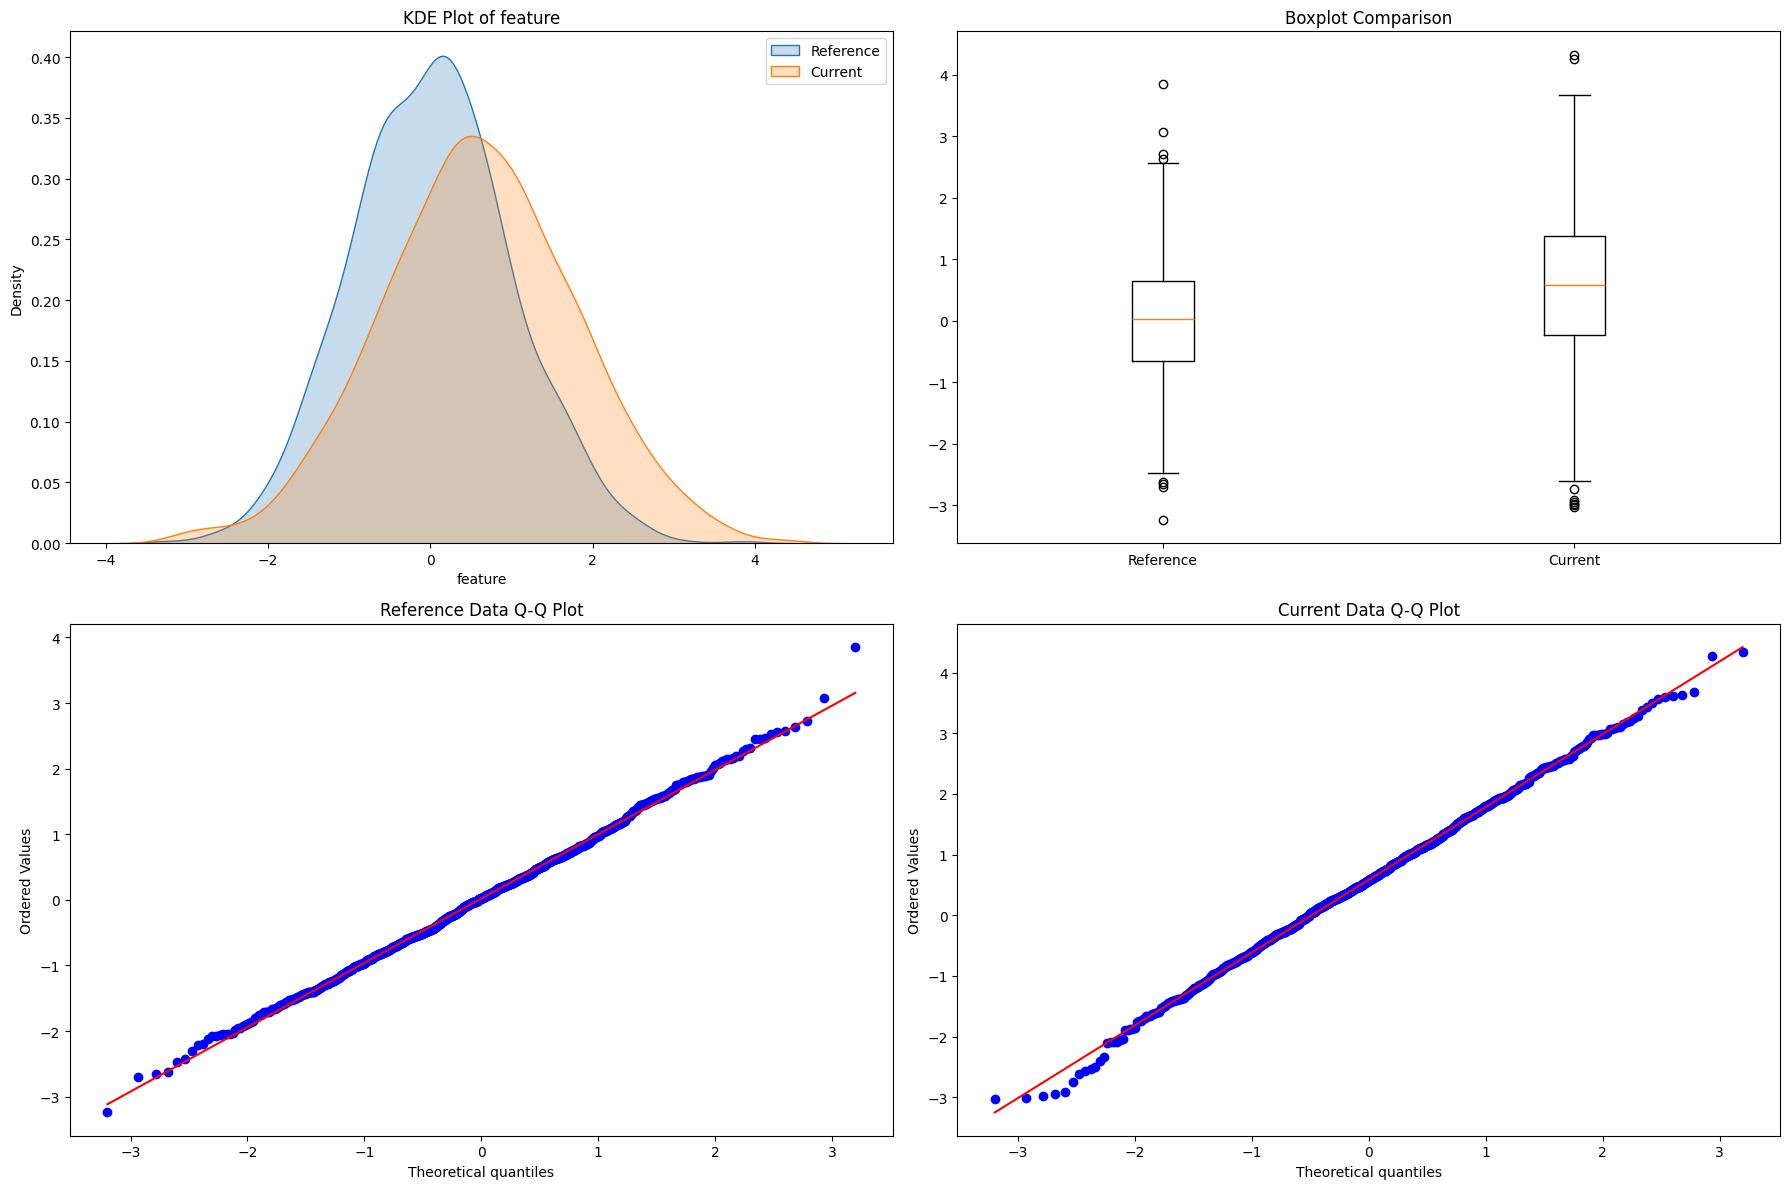

Statistical Tests Results:
KS Test: Statistic=0.2310, p-value=0.0000
T-Test: Statistic=-11.5671, p-value=0.0000
Mutual Information Score: 6.9078
Jensen-Shannon Distance: inf
KS Test: Significant drift detected (p < 0.05)
T-Test: Significant mean difference detected (p < 0.05)
JS Distance: Significant distribution change (JS > 0.1)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mutual_info_score
from scipy.spatial import distance
def detect_data_drift(reference_data, current_data, feature_name):
    reference_feature = reference_data[feature_name]
    current_feature = current_data[feature_name]
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    sns.kdeplot(reference_feature, label='Reference', shade=True)
    sns.kdeplot(current_feature, label='Current', shade=True)
    plt.title(f'KDE Plot of {feature_name}')
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.boxplot([reference_feature, current_feature], labels=['Reference', 'Current'])
    plt.title(f'Boxplot Comparison')
    plt.subplot(2, 2, 3)
    stats.probplot(reference_feature, dist="norm", plot=plt)
    plt.title('Reference Data Q-Q Plot')
    plt.subplot(2, 2, 4)
    stats.probplot(current_feature, dist="norm", plot=plt)
    plt.title('Current Data Q-Q Plot')
    plt.tight_layout()
    plt.show()
    ks_stat, ks_p = stats.ks_2samp(reference_feature, current_feature)
    t_stat, t_p = stats.ttest_ind(reference_feature, current_feature)
    mi_score = mutual_info_score(reference_feature, current_feature)
    js_dist = distance.jensenshannon(reference_feature, current_feature)
    print(f"Statistical Tests Results:")
    print(f"KS Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")
    print(f"T-Test: Statistic={t_stat:.4f}, p-value={t_p:.4f}")
    print(f"Mutual Information Score: {mi_score:.4f}")
    print(f"Jensen-Shannon Distance: {js_dist:.4f}")
    drift_detected = False
    if ks_p < 0.05:
        print("KS Test: Significant drift detected (p < 0.05)")
        drift_detected = True
    if t_p < 0.05:
        print("T-Test: Significant mean difference detected (p < 0.05)")
        drift_detected = True
    if js_dist > 0.1:
        print(f"JS Distance: Significant distribution change (JS > 0.1)")
        drift_detected = True
    
    if not drift_detected:
        print("No significant drift detected across all metrics")
np.random.seed(42)
ref_data = pd.DataFrame({'feature': np.random.normal(0, 1, 1000)})
curr_data = pd.DataFrame({'feature': np.random.normal(0.5, 1.2, 1000)})
detect_data_drift(ref_data, curr_data, 'feature')